In [45]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.distance import geodesic
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests

In [1]:
!pip install census
!pip install censusdata
!pip install censusgeocode
!pip install geopy
!pip install geopandas
!pip install plotly_express

In [46]:
comp = pd.read_excel('TennesseecompDF.xlsx')
comp = comp.drop(columns=['Unnamed: 0','NumOfKohl'])
comp

,Tract,County,Store,TotalVists,TotalNumOfCompetitors,TotalCompetitorVisits
0,100200,63,Kohls,588026,1,588026
1,21002,165,Kohls,503988,1,503988
2,40908,149,Kohls,462298,1,462298
3,4404,93,Kohls,445887,1,445887
4,5813,93,Kohls,418345,1,418345
...,...,...,...,...,...,...
114,920500,55,The Home Depot,455324,1,455324
115,40601,167,The Home Depot,402551,1,402551
116,960402,51,The Home Depot,388492,1,388492
117,970600,31,The Home Depot,357006,1,357006


In [47]:
newDF = pd.DataFrame()
for a in range(0,len(comp)):
    county = comp.County[a]
    countyDF = comp[comp['County'] == county]
    countyDF.reset_index(inplace=True, drop=True)
    
    for b in range(0, len(countyDF)):
        tract = countyDF.Tract[b]
        tractDF = countyDF[countyDF['Tract'] == tract]
        tractDF.reset_index(inplace=True, drop=True)
       
       
        NumOfKohl = 0
        NumOfLowe = 0
      
        NumOfHomeDepot = 0
        
        VisitsOfKohl = 0
        VisitsOfLowe = 0
      
        VisitsOfHomeDepot = 0
        
        
        for i,j in tractDF.iterrows():
                
        
          
                
            if (j['Store'] == 'Kohls'):
                NumOfKohl = NumOfKohl + 1
                VisitsOfKohl = j['TotalVists']
                
            if (j['Store'] == 'Lowes'):
                NumOfLowe = NumOfLowe + 1
                VisitsOfLowe = j['TotalVists']
            
                
            if (j['Store'] == 'The Home Depot'):
                NumOfHomeDepot = NumOfHomeDepot + 1
                VisitsOfHomeDepot = j['TotalVists']
            
        
                
        data = {
                'Tract' : tract,
                'County'  : county,
                'TotalNumOfCompetitors' : tractDF.iloc[0]['TotalNumOfCompetitors'],
                'TotalCompetitorVisits' : tractDF.iloc[0]['TotalCompetitorVisits'],
               
                'NumOfKohl' : NumOfKohl,
                'NumOfLowe' : NumOfLowe,
               
                'NumOfHomeDepot' : NumOfHomeDepot,
                
                'VisitsOfKohl' : VisitsOfKohl,
                'VisitsOfLowe' : VisitsOfLowe,
              
                'VisitsOfHomeDepot' : VisitsOfHomeDepot
                
               }
        data = pd.DataFrame(data, index=[0])
        newDF = pd.concat([newDF, data])

newDF.reset_index(inplace=True, drop=True)
newDF.drop_duplicates(subset=None, keep="first", inplace=True)

In [48]:
census = pd.read_excel('Tennessee Census Data.xlsx')
census

,Tract,County,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried
0,19004,37,226,991,536,191,109,9,991,689,502,1380,1481
1,19007,37,212,430,478,167,71,9,430,441,419,684,715
2,19008,37,411,1461,554,162,143,86,1461,1015,811,1890,1879
3,19105,37,313,1231,940,415,161,112,1231,1152,823,1678,1931
4,19106,37,336,988,903,327,346,82,988,797,358,1602,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,80103,147,614,1990,504,778,225,188,1990,1033,1157,1100,3250
1697,80104,147,498,2436,465,515,449,218,2436,1040,1952,1112,4010
1698,80200,147,486,1630,453,237,498,71,1630,520,1330,1057,2950
1699,80301,147,118,680,245,146,105,11,680,318,414,601,1162


In [49]:
rent =  pd.read_excel('TennesseePropertyTractAverageRent.xlsx')

In [50]:
censusRent = census.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRent
censusRent = censusRent.drop(columns=['Unnamed: 0'])

In [51]:
tj = pd.read_excel('t-j-maxx-tennessee.xlsx')
tj

,Rank,Name,Store ID,TotalVisits,lat,lng
0,1,"T.J. Maxx / 617 Parkway, Sevierville, TN, Unit...",1086,788124,35.860713,-83.568386
1,2,"T.J. Maxx / 103 S Mount Juliet Rd Ste 610, Mou...",1038,749091,36.167258,-86.507426
2,3,"T.J. Maxx / Knoxville, TN, United States",249,745427,35.926121,-84.050382
3,4,"T.J. Maxx / 377 W Jackson St, Cookeville, TN, ...",760,660811,36.157642,-85.519770
4,6,"T.J. Maxx / 127 Stonebrook Pl, Jackson, TN, Un...",108,570941,35.685355,-88.858153
5,7,"T.J. Maxx / 367 S Illinois Ave, Oak Ridge, TN,...",1427,564026,36.008977,-84.255404
6,8,"T.J. Maxx / 1911 Old Fort Pkwy, Murfreesboro, ...",579,561342,35.843694,-86.426864
7,9,"T.J. Maxx / 545 Cool Springs Blvd, Franklin, ...",809,556232,35.948438,-86.823787
8,10,"T.J. Maxx / 2116 Roan St./Suite 2b, Johnson Ci...",156,545687,36.342528,-82.374279
9,11,"T.J. Maxx / 2700 Wilma Rudolph Blvd, Clarksvil...",14,534449,36.584582,-87.299433


In [52]:
tjDF = pd.DataFrame()
j = 0
for i in  list(range(0,len(tj))):
    print(i)
    try:
        CensusGeoData1 = cg.coordinates(x=tj.lng[i], y= tj.lat[i])
        
    except:
        pass
    
    else:
        tjDF.loc[j, 'Tract']  = CensusGeoData1 ['Census Tracts'][0]['TRACT']
        tjDF.loc[j,'County'] = CensusGeoData1 ['Census Tracts'][0]['COUNTY']
        tjDF.loc[j,'TotalVisits'] = tj.TotalVisits[i]
        j = j + 1
    
tjDF.head()        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


,Tract,County,TotalVisits
0,080500,155,788124.0
1,030908,189,749091.0
2,004403,093,745427.0
3,000700,141,660811.0
4,001605,113,570941.0


In [53]:
tjDF['Tract'] = tjDF['Tract'].astype(int)
tjDF['County'] = tjDF['County'].astype(int)

In [54]:
censusRentStore = tjDF.merge(
    censusRent,
    "inner",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRentStore['AvgRent'] = censusRentStore['AvgRent'] .fillna(0)
censusRentStore

,Tract,County,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent
0,80500,155,788124.0,403,1562,835,96,346,0,1562,466,1663,817,2635,0.000000
1,30908,189,749091.0,694,2157,718,559,679,277,2157,838,1334,1313,4147,1748.250000
2,4403,93,745427.0,356,1185,1351,228,220,323,1185,613,1066,1431,1868,1007.800000
3,700,141,660811.0,104,734,986,98,124,0,734,410,727,1225,1092,0.000000
4,1605,113,570941.0,222,542,403,157,33,48,542,286,347,1730,823,0.000000
5,20100,1,564026.0,162,649,858,60,123,36,649,459,600,1054,1030,863.333333
6,41800,149,561342.0,283,1051,555,90,78,68,1051,1299,408,1771,1324,1259.333333
7,50307,187,556232.0,202,991,1176,472,316,93,991,547,1200,1225,1647,1664.000000
8,60401,179,545687.0,50,532,363,168,106,4,532,143,868,365,924,0.000000
9,102005,125,534449.0,318,1633,864,146,321,75,1633,1218,741,1079,2823,0.000000


In [55]:
trainData = censusRentStore.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

trainData = trainData.fillna(0)
trainData = trainData.drop(columns=['Tract','County'])
trainData

,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,...,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
0,788124.0,403,1562,835,96,346,0,1562,466,1663,...,2635,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,749091.0,694,2157,718,559,679,277,2157,838,1334,...,4147,1748.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,745427.0,356,1185,1351,228,220,323,1185,613,1066,...,1868,1007.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,660811.0,104,734,986,98,124,0,734,410,727,...,1092,0.000000,1.0,323738.0,1.0,0.0,0.0,323738.0,0.0,0.0
4,570941.0,222,542,403,157,33,48,542,286,347,...,823,0.000000,2.0,946379.0,1.0,0.0,1.0,409556.0,0.0,536823.0
5,564026.0,162,649,858,60,123,36,649,459,600,...,1030,863.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,561342.0,283,1051,555,90,78,68,1051,1299,408,...,1324,1259.333333,1.0,1047632.0,0.0,1.0,0.0,0.0,1047632.0,0.0
7,556232.0,202,991,1176,472,316,93,991,547,1200,...,1647,1664.000000,1.0,757915.0,0.0,1.0,0.0,0.0,757915.0,0.0
8,545687.0,50,532,363,168,106,4,532,143,868,...,924,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,534449.0,318,1633,864,146,321,75,1633,1218,741,...,2823,0.000000,3.0,2050534.0,1.0,1.0,1.0,396081.0,975032.0,679421.0


In [56]:
cols = ['TotalFemale40to49','NumOfKohl','NumOfLowe',
       'FamilyHouseholds','NonFamilyHouseholds','TotalNumOfCompetitors', 
       'NumOfHomeDepot','VisitsOfLowe', 'VisitsOfKohl',
       'NumberOfHouseholdIncomeLessThan100000',
       'NumberOfHouseholdIncomeLessThan150000',
       'NumberOfHouseholdIncomeLessThan200000',
        'NumofEarnersInFamily',
        'Population30to39',  'TotalCompetitorVisits',
        'PopulationAbove60',
       'VisitsOfHomeDepot']

cols_str = " + ".join(cols)
mod = smf.ols(formula=f"TotalVisits ~ {cols_str}", data=trainData)
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            TotalVisits   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                 -1.153
Method:                 Least Squares   F-statistic:                    0.2733
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.975
Time:                        02:20:01   Log-Likelihood:                -259.62
No. Observations:                  20   AIC:                             549.2
Df Residuals:                       5   BIC:                             564.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [57]:
#Test data 
censusTest = pd.read_excel('Tennessee Census Data.xlsx')

censusTestRent = censusTest.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

censusTestRent = censusTestRent.drop(columns=['Unnamed: 0'])

testData = censusTestRent.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

testData = testData.fillna(0)
censusRentStoreCopy = censusRentStore
testData = testData[~testData.County.isin(censusRentStoreCopy['County'])]
tractCountyDF = testData[['Tract','County']]
testData = testData.drop(columns=['Tract','County'])
data = testData
testData

,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
27,130,476,241,65,62,41,476,110,546,254,927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,98,591,296,93,18,36,591,243,542,564,925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,75,541,427,54,37,5,541,193,915,366,992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,146,510,199,63,103,21,510,149,601,375,794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,228,1078,278,148,160,18,1078,461,1171,550,1882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,614,1990,504,778,225,188,1990,1033,1157,1100,3250,1324.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,498,2436,465,515,449,218,2436,1040,1952,1112,4010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698,486,1630,453,237,498,71,1630,520,1330,1057,2950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1699,118,680,245,146,105,11,680,318,414,601,1162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [59]:
X, y = trainData.iloc[:,1:],trainData.iloc[:,0]

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Training score:  0.9999999999998213


/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


RMSE: 167924.89


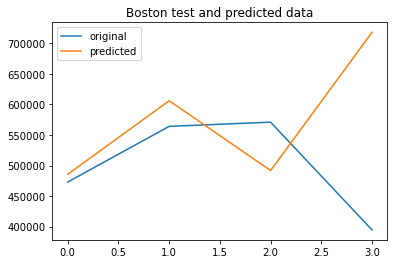

[485570.28 605940.06 491777.   718046.6 ]


In [61]:
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=10)

ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

preds = xgbr.predict(testData)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()

print(ypred)

In [62]:
predDF = pd.DataFrame(preds)
predDF.columns = ['Score']
predDF.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
tractCountyDF.reset_index(inplace=True, drop=True)

In [63]:
for i in list(range(0,len(data))):
    data.loc[i,'Prediction'] =  predDF.loc[i,'Score']
    data.loc[i, 'Tract'] = tractCountyDF.loc[i,'Tract']
    data.loc[i, 'County'] = tractCountyDF.loc[i,'County']
    
    

In [64]:
data.to_excel('Tennessee TJ Maxx Prediction.xlsx')